In [ ]:
%%capture
!pip install mediapipe

In [ ]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

In [ ]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !wget http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

In [ ]:
!unzip /content/AFLW2000-3D.zip

In [ ]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

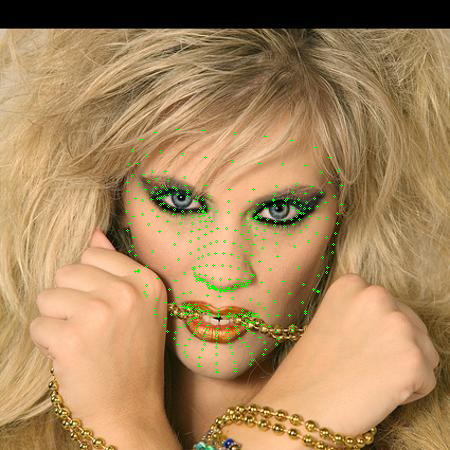

In [ ]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img


# choosing random image
random_file = '/content/AFLW2000/image00002.jpg'

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread(random_file)
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=1)
      cv2_imshow(image)

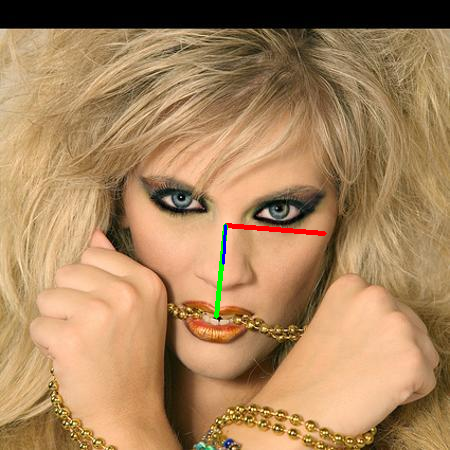

In [ ]:
random_file = 'image00002'
image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('/content/AFLW2000/'+random_file+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
cv2_imshow(draw_axis(image,pitch,yaw,roll))

In [ ]:
from glob import glob

mydir = "/content/AFLW2000/"

file_list = glob(mydir + "*.jpg")
file_list

In [ ]:
len(file_list)

2000

In [ ]:
faceModule = mediapipe.solutions.face_mesh
feature_X,feature_y = [],[]
yaws, rolls, pitchs =[],[],[]

for i in range(len(file_list)):
  image = cv2.imread(file_list[i])
  # loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
  mat_file = sio.loadmat(file_list[i].split('.')[0]+'.mat')
  # extracting the labels 3 angels
  pose_para = mat_file["Pose_Para"][0][:3]
  pitch = pose_para[0]
  yaw = pose_para[1]
  roll = pose_para[2]

  yaws.append(yaw); rolls.append(roll);pitchs.append(pitch)

  # loading image and its correspinding mat file
  with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread(file_list[i])

    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    Bibas = []
    
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              Bibas.append(relative_x) 
              Bibas.append(relative_y) 

  feature_X.append(Bibas) 
  # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
  # cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=1)
  # cv2_imshow(image)

In [ ]:
len(feature_X)

2000

In [ ]:
df = pd.DataFrame(feature_X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,238.0,301.0,243.0,283.0,238.0,288.0,227.0,254.0,242.0,275.0,...,235.0,218.0,233.0,222.0,233.0,225.0,269.0,200.0,271.0,197.0
1,216.0,316.0,215.0,277.0,219.0,289.0,213.0,242.0,216.0,266.0,...,261.0,219.0,254.0,221.0,249.0,223.0,314.0,216.0,320.0,210.0
2,218.0,297.0,218.0,283.0,219.0,286.0,220.0,254.0,219.0,275.0,...,253.0,234.0,249.0,236.0,246.0,237.0,291.0,237.0,295.0,235.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,230.0,303.0,253.0,278.0,237.0,285.0,250.0,245.0,258.0,269.0,...,261.0,226.0,259.0,228.0,259.0,229.0,291.0,233.0,295.0,230.0


In [ ]:
df['yaw'] = yaws
df['roll'] = rolls
df['pitch'] = pitchs

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,yaw,roll,pitch
0,238.0,301.0,243.0,283.0,238.0,288.0,227.0,254.0,242.0,275.0,...,222.0,233.0,225.0,269.0,200.0,271.0,197.0,-0.237912,-0.212938,-0.214529
1,216.0,316.0,215.0,277.0,219.0,289.0,213.0,242.0,216.0,266.0,...,221.0,249.0,223.0,314.0,216.0,320.0,210.0,0.136994,0.078335,0.125778
2,218.0,297.0,218.0,283.0,219.0,286.0,220.0,254.0,219.0,275.0,...,236.0,246.0,237.0,291.0,237.0,295.0,235.0,0.202275,0.160123,-0.258406
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.109455,0.568251,-0.430106
4,230.0,303.0,253.0,278.0,237.0,285.0,250.0,245.0,258.0,269.0,...,228.0,259.0,229.0,291.0,233.0,295.0,230.0,-0.588702,0.417401,-0.118078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,221.0,306.0,220.0,275.0,221.0,283.0,215.0,244.0,220.0,266.0,...,221.0,238.0,223.0,285.0,213.0,290.0,212.0,0.070856,0.006497,-0.113012
1996,238.0,289.0,251.0,266.0,239.0,273.0,241.0,243.0,253.0,259.0,...,229.0,240.0,230.0,257.0,228.0,259.0,225.0,-0.738262,0.090391,-0.044048
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.304832,0.428666,0.319780
1998,228.0,292.0,248.0,281.0,234.0,280.0,248.0,257.0,252.0,276.0,...,234.0,251.0,237.0,265.0,230.0,267.0,229.0,-0.601608,0.394831,-0.431225


In [ ]:
df.dropna(inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,yaw,roll,pitch
0,238.0,301.0,243.0,283.0,238.0,288.0,227.0,254.0,242.0,275.0,...,222.0,233.0,225.0,269.0,200.0,271.0,197.0,-0.237912,-0.212938,-0.214529
1,216.0,316.0,215.0,277.0,219.0,289.0,213.0,242.0,216.0,266.0,...,221.0,249.0,223.0,314.0,216.0,320.0,210.0,0.136994,0.078335,0.125778
2,218.0,297.0,218.0,283.0,219.0,286.0,220.0,254.0,219.0,275.0,...,236.0,246.0,237.0,291.0,237.0,295.0,235.0,0.202275,0.160123,-0.258406
4,230.0,303.0,253.0,278.0,237.0,285.0,250.0,245.0,258.0,269.0,...,228.0,259.0,229.0,291.0,233.0,295.0,230.0,-0.588702,0.417401,-0.118078
5,236.0,300.0,251.0,278.0,240.0,283.0,245.0,252.0,253.0,271.0,...,232.0,252.0,234.0,279.0,231.0,282.0,230.0,-0.502033,0.278068,-0.224874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,249.0,292.0,253.0,263.0,245.0,274.0,239.0,242.0,253.0,255.0,...,232.0,242.0,232.0,269.0,230.0,271.0,228.0,-0.446191,-0.083462,0.126109
1995,221.0,306.0,220.0,275.0,221.0,283.0,215.0,244.0,220.0,266.0,...,221.0,238.0,223.0,285.0,213.0,290.0,212.0,0.070856,0.006497,-0.113012
1996,238.0,289.0,251.0,266.0,239.0,273.0,241.0,243.0,253.0,259.0,...,229.0,240.0,230.0,257.0,228.0,259.0,225.0,-0.738262,0.090391,-0.044048
1998,228.0,292.0,248.0,281.0,234.0,280.0,248.0,257.0,252.0,276.0,...,234.0,251.0,237.0,265.0,230.0,267.0,229.0,-0.601608,0.394831,-0.431225


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.1)

In [ ]:
X_train = df_train.drop(columns=['yaw','roll','pitch'])
X_test  =  df_test.drop(columns=['yaw','roll','pitch'])

yaws_train = df_train['yaw']; yaws_test = df_test['yaw']
rolls_train = df_train['roll']; rolls_test = df_test['roll']
pitch_train = df_train['pitch']; pitch_test = df_test['pitch']

In [ ]:
from sklearn.svm import SVR
clf_yaw = SVR(C=1.0, epsilon=0.2)

clf_yaw.fit(X_train, yaws_train)

SVR(epsilon=0.2)

In [ ]:
clf_yaw.score(X_test, yaws_test)

0.9105972641450799

In [ ]:
from sklearn.svm import SVR
clf_roll = SVR(C=1.0, epsilon=0.2)

clf_roll.fit(X_train, rolls_train)
clf_roll.score(X_test, rolls_test)

0.792657274433626

In [ ]:
from sklearn.svm import SVR
clf_pitch = SVR(C=1.0, epsilon=0.2)

clf_pitch.fit(X_train, pitch_train)
clf_pitch.score(X_test, pitch_test)

0.7235652060609088

In [ ]:
def get_landmarks(image):

  faceModule = mediapipe.solutions.face_mesh
  # loading image and its correspinding mat file
  with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    #image = cv2.imread(random_file)

    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    arr = []
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              arr.append(relative_x)
              arr.append(relative_y)

  return np.array(arr).reshape(1,-1)

In [ ]:
image = cv2.imread('/content/AFLW2000/image00002.jpg')

arr = get_landmarks(image)
clf_yaw.predict(arr)

array([0.07173936])

In [ ]:
def predict_all(image):

  arr = get_landmarks(image)

  try:
    a,b,c = clf_yaw.predict(arr),clf_roll.predict(arr),clf_pitch.predict(arr)
    return draw_axis(image, pitch=c,yaw=a,roll=b,tdx=arr[:,198],tdy=arr[:,199])
  except:
    return image

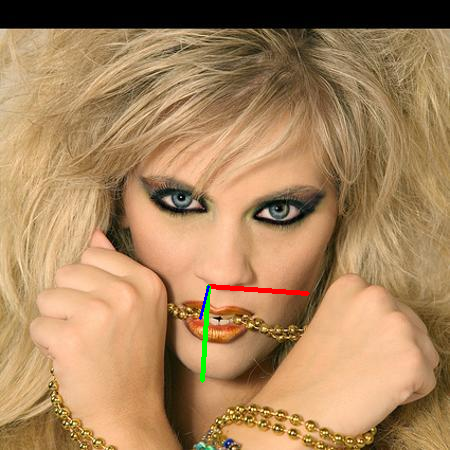

In [ ]:
image = cv2.imread('/content/AFLW2000/image00002.jpg')

cv2_imshow(predict_all(image))

In [ ]:
import cv2
video_path = "/content/video_habeba.mp4"

# Open the video file
video = cv2.VideoCapture(video_path)
width= int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
# Initialize a counter for the frames
frame_count = 0
frames = []
# Loop through the frames of the video
while True:
    # Read the next frame
    ret, frame = video.read()
    #frame=cv2.rotate(frame, cv2.ROTATE_180)
    # If the frame is not successfully read, break the loop
    if not ret:
        break

    # Do something with the frame, for example, save it as an image
    pred = predict_all(frame)
    if pred.shape != np.array([-1]).shape:
      frames.append(pred)

    # Increment the frame counter
      frame_count += 1

# Release the video file
video.release()

In [ ]:
out = cv2.VideoWriter('out2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))
for frame in frames:
    out.write(frame)
out.release()

In [ ]:
import cv2
video_path = "/content/vid.mp4"

# Open the video file
video = cv2.VideoCapture(video_path)
width= int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
# Initialize a counter for the frames
frame_count = 0
frames = []
# Loop through the frames of the video
while True:
    # Read the next frame
    ret, frame = video.read()
    frame=cv2.rotate(frame, cv2.ROTATE_180)
    # If the frame is not successfully read, break the loop
    if not ret:
        break
    
    # Do something with the frame, for example, save it as an image
    pred = predict_all(frame)
    if pred.shape != np.array([-1]).shape:
      frames.append(pred)

    # Increment the frame counter
      frame_count += 1

# Release the video file
video.release()